# Data Visualization
In this notebook, we conduct data visulization on the clean data.

## Load the data

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clean_data = pd.read_csv("../data/clean.csv")
clean_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since the feature `id` is irrelevant, we drop it from our data.

In [18]:
clean_data = clean_data.drop("id", axis=1)

## Analysis

### General

Let us first find out what features do we have.

In [19]:
clean_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Besides the feature `id` and the response variable `diagnosis`, there are 30 features in total, which can be splited into three groups - mean, standard error, and "worst" or largest. In each group, we have `radius`, `texture`, `perimeter`, `area`, `smoothness`, `compactness`, `concavity`, `concave points`, `symmetry`, and `fractal dimension`.

Since the three groups of features describe similar things, we might want to inspect the collinearity between each pair of features by computing the correlation matrix.

In [20]:
clean_data.drop("diagnosis", axis=1).corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


We can see some pairs of features have relatively high correlation, such as `radius_mean` vs `radius_worst` and `perimeter_mean` vs `radius_mean`. This can give us a warning about variability and stability for later computation and statistical analysis.

Then, we print out some statistics of each column or feature. Since all features are numeric, the `describe()` method works for each column.

In [21]:
clean_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We can see that the column `diagnosis` has the mean $0.3726$. Since we use `0` and `1` to represent `belign` and `malignant` cancer, the mean implies that around $37.26\%$ of the cancers in our data are `malignant`. 

Since the features are numerical, we can also observe their distritbuions. By the central limit theorem in statistics, some of our features should have a approximately normal distribution.

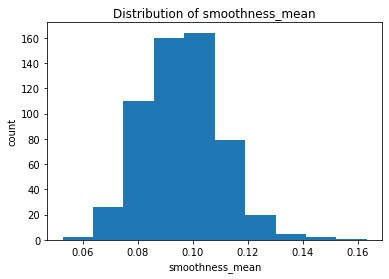

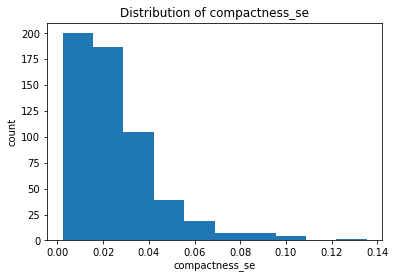

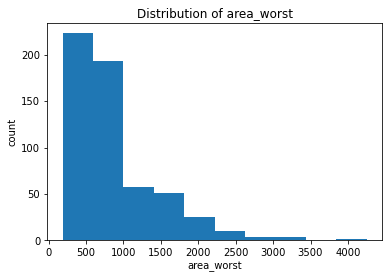

In [22]:
plt.figure()
plt.hist(clean_data['smoothness_mean'])
plt.xlabel("smoothness_mean")
plt.ylabel("count")
plt.title("Distribution of smoothness_mean")
plt.savefig("../figures/smoothness_mean_distr")
plt.show()

plt.figure()
plt.hist(clean_data['compactness_se'])
plt.xlabel("compactness_se")
plt.ylabel("count")
plt.title("Distribution of compactness_se")
plt.savefig("../figures/compactness_se_distr")
plt.show()

plt.figure()
plt.hist(clean_data['area_worst'])
plt.xlabel("area_worst")
plt.ylabel("count")
plt.title("Distribution of area_worst")
plt.savefig("../figures/area_worst_distr")
plt.show()

After plotting the distributions of all the features, we found that the majority of the `mean` features are roughly symmetric or normal whereas the majority of the `se` and `worst` features are relatively right-skewed. 

### Belign vs Malignant

Since we are interested in studying the difference between belign and malignant cancers, it might be helpful to analyze and compute the statistics of two populations separately and then compare.

In [23]:
belign = clean_data[clean_data['diagnosis'] == 0]
malignant = clean_data[clean_data['diagnosis'] == 1]

We first compare the means of each feature in two populations.

In [24]:
clean_data.groupby('diagnosis').mean().transpose()

diagnosis,0.0,1.0
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


Obviously, most of the features have different averages in two populations, but it is hard to tell whether such differences are significant or not. To assess this, we can compare the distributions of features in each population. 

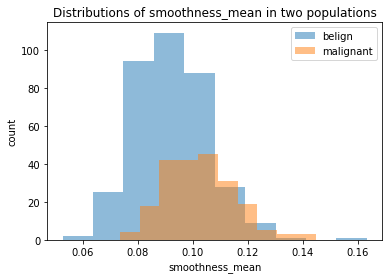

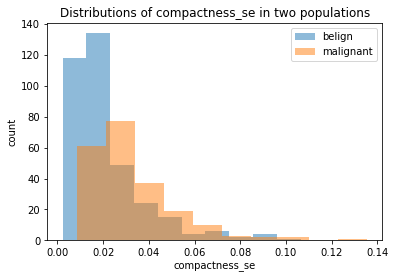

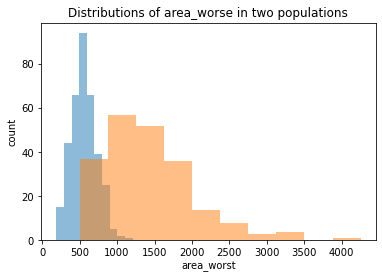

In [26]:
plt.figure()
plt.hist(belign['smoothness_mean'], alpha=0.5, label="belign")
plt.hist(malignant['smoothness_mean'], alpha=0.5, label="malignant")
plt.xlabel('smoothness_mean')
plt.ylabel('count')
plt.legend()
plt.title("Distributions of smoothness_mean in two populations")
plt.savefig("../figures/smoothness_mean_distr_two_popu")
plt.show()

plt.figure()
plt.hist(belign['compactness_se'], alpha=0.5, label="belign")
plt.hist(malignant['compactness_se'], alpha=0.5, label="malignant")
plt.xlabel('compactness_se')
plt.ylabel('count')
plt.legend()
plt.title("Distributions of compactness_se in two populations")
plt.savefig("../figures/compactness_se_distr_two_popu")
plt.show()

plt.figure()
plt.hist(belign['area_worst'], alpha=0.5, label="belign")
plt.hist(malignant['area_worst'], alpha=0.5, label="malignant")
plt.xlabel('area_worst')
plt.ylabel('count')
plt.title("Distributions of area_worse in two populations")
plt.savefig("../figures/area_worst_distr_two_popu")
plt.show()

We chose the same three features we plotted before. We can see that although `belign` and `malignant` have different distributions in all the plots, it is still hard to judge whether it is due to the randomness since two populations have different size (as showed clearly in `smoothness_mean` feature). Thus, we should conduct some more rigorous statistical hypothesis testing, such as two-sample t-test, to judge this. And this will be done in a separate notebook called `two-populations-analysis.ipynb`. 